In [6]:
import imageio as imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from tqdm import tqdm

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, palette, resolution=0.02, same_aspect=False):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)


    fig, ax = plt.subplots()

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=2)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()), zorder=1)

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (std)')
    _ = ax.set_ylabel('petal width (std)')
    return ax

In [8]:
out_dir = os.path.join(os.getcwd(), "../../out/classification/k_nearest_neighbours")

In [9]:
from sklearn.preprocessing import StandardScaler

# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

order = pd.unique(df['name'])
print(order)

df[['sepal width (std)', 'petal length (std)', 'sepal length (std)', 'petal width (std)']] = StandardScaler().fit_transform(df[['sepal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'petal width (cm)']])

['Setosa' 'Versicolor' 'Virginica']


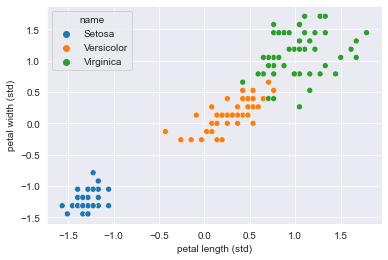

In [10]:
sns.scatterplot(data=df, x='petal length (std)', y='petal width (std)', hue='name', palette=dict(zip(
    order,
    sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'knn-example-data-only.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


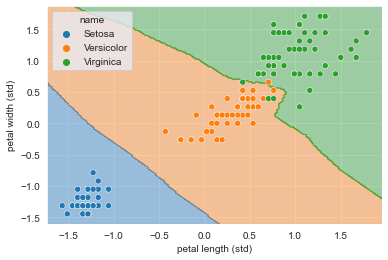

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder

clf = KNeighborsClassifier()
y = OrdinalEncoder(categories=[order]).fit_transform(df[['name']])
clf.fit(df[['petal length (std)', 'petal width (std)']].values, y)

plot_decision_regions(df[['petal length (std)', 'petal width (std)']].values, df['name'], clf,
                      palette=dict(zip(
                          order,
                          sns.color_palette()
                      ))
                      )
plt.savefig(os.path.join(out_dir, 'knn-example.png'), bbox_inches='tight')
plt.show()

In [12]:
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

results = defaultdict(dict)
x = np.arange(100)
for j in tqdm(range(1, 1000, 10)):
    noise = {
        f"n{i}": np.random.uniform(size=x.shape[0]) for i in range(0, j)
    }
    df_knn_limit = pd.DataFrame({
        "x": x,
        **noise,
        "y": [0 if x < 50 else 1 for x in x]
    })

    numeric_cols = list(set(df_knn_limit.columns.values) - set('y'))
    df_knn_limit[numeric_cols] = StandardScaler().fit_transform(df_knn_limit[numeric_cols])

    for name, clf in {
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier()
    }.items():
        results[name][j] = np.mean(cross_val_score(clf, df_knn_limit[numeric_cols], df_knn_limit['y']))

print(results)

 45%|████▌     | 45/100 [00:32<00:40,  1.37it/s]


KeyboardInterrupt: 

In [ ]:
sns.lineplot(data=results)

In [ ]:
for key, x in results.items():
    print(key, np.mean(list(x.values())))

In [ ]:
import numpy as np

x1 = np.arange(100)
df_knn_limit = pd.DataFrame({
    "x1": x1,
    "x2": np.random.normal(size=x1.shape[0]),
    "y": [0 if x < 50 else 1 for x in x1]
})

theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

df_knn_limit[['x1', 'x2']] = StandardScaler().fit_transform(df_knn_limit[['x1', 'x2']])
# df_knn_limit[['x1', 'x2']] = df_knn_limit[['x1', 'x2']].values.dot(R)

sns.scatterplot(data=df_knn_limit, x='x1', y='x2', hue='y')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'])

plot_decision_regions(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'], clf,
                      palette=dict(zip(
                          [0, 1],
                          sns.color_palette()
                      ))
                      )
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'])

plot_decision_regions(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'], clf,
                      palette=dict(zip(
                          [0, 1],
                          sns.color_palette()
                      ))
                      )
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'])

plot_decision_regions(df_knn_limit[['x1', 'x2']].values, df_knn_limit['y'], clf,
                      palette=dict(zip(
                          [0, 1],
                          sns.color_palette()
                      ))
                      )
plt.show()